Correlation

For this analysis, I need to check if there is a relationship between the predicted values (model) and the values I know (y). Whether this relationship is positive or negative.

### Organization of libraries

In [1]:
#salvar/carregar arquivos em diferentes formatos
import joblib
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#Carregar o modelo
from keras.models import load_model


2022-08-05 19:02:08.436716: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-05 19:02:08.436842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Regression Model A549 - MINOR ERROR

In [2]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens

modelo_menor_erro = load_model('./../../results/results_A549/9_model__A549_regressao_menor_erro_Mean_squared_error_30%_18_PACIENCE2022-6-29.h5')
modelo_menor_erro

2022-08-05 19:02:13.397964: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-05 19:02:13.402994: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-05 19:02:13.403329: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-05 19:02:13.404081: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a8bce4a08e2b): /proc/driver/nvidia/version does not exist
2022-08-05 19:02:13.425602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

### Data needed to get X_test

In [3]:
#Importando as imagnes que foram salvas para treinar e testar o modelo quando foram separadas usando train_test_split

X_test_menor_erro = joblib.load('./../../results/results_A549/10_images_de_X_test_a549_melhor_modelo_18_PACIENCE_500_2022-6-29.gz') #carregando arquivo
X_test_menor_erro.shape #30% das imagens que foram salvas para testar o modelo

(341, 200, 200, 3)

In [4]:
#Importando os rótulos de cada imagem - número de células para cada imagem

y_test_menor_erro = joblib.load('./../../results/results_A549/11_images_de_y_test_a549_melhor_modelo_18_PACIENCE%00_2022-6-29.gz')
y_test_menor_erro.shape #30% dos rótulos que foram salvos das imagens

(341,)

### Getting X_test values to create predicted data list

In [5]:
#ROTULO
dados_prev = modelo_menor_erro.predict(X_test_menor_erro) #usando a função predict para obter os valores das imagens de X_test
lista_previsto_menor_erro = dados_prev.flatten().tolist() #criando uma lista com valores e retirando as listas dentro de listas (comuns em arrays)
len(lista_previsto_menor_erro)

2022-08-05 19:02:24.444384: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40920000 exceeds 10% of free system memory.
2022-08-05 19:02:25.543129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-05 19:02:25.575741: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800005000 Hz
2022-08-05 19:02:26.071636: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15360000 exceeds 10% of free system memory.
2022-08-05 19:02:27.008285: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 160579584 exceeds 10% of free system memory.
2022-08-05 19:02:29.088019: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 40144896 exceeds 10% of free system memory.
2022-08-05 19:02:29.616090: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 77078528 exceeds 10% of free system memory.


341

### Observed data values

In [6]:
#ROTULO
lista_observado_menor_erro = list(y_test_menor_erro) #Salvando os rótulos que estavam em único array em uma lista
len(lista_observado_menor_erro)

341

### Creating the dataframe to organize the lists of values

In [7]:
import pandas as pd #Chamando pandas para criar Dataframe
from scipy.stats.stats import pearsonr as stats #importando a biblioteca para gráfico de correlação


In [8]:
#criando um dataframe para organizar os dados de cada lista criada
df_menor_erro = pd.DataFrame(zip(lista_observado_menor_erro,lista_previsto_menor_erro), 
                  columns = ['Observed values','Lista preditos']) #criando as colunas que vão receber as listas
df_menor_erro.tail() #chamando a dataframe

,Observed values,Lista preditos
336,591,489.135406
337,1041,1088.215820
338,212,302.097565
339,241,289.556000
340,1044,984.529114


In [9]:
#Precisava do dado arrendodado, já que era muito extenso, então foi criada uma nova coluna com esses valores e adicionado ao df
teste = round(df_menor_erro['Lista preditos'],2) #arredondando
df_menor_erro['Predicted values'] = teste #criando a coluna
df_menor_erro.head()

,Observed values,Lista preditos,Predicted values
0,466,444.524567,444.52
1,944,946.898376,946.90
2,455,536.983337,536.98
3,539,566.919373,566.92
4,874,833.593018,833.59


In [10]:
#alternando a ordem das colunas da Dataframe para melhor organizar
df_menor_erro = df_menor_erro.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df_menor_erro.head()

,Observed values,Predicted values,Lista preditos
0,466,444.52,444.524567
1,944,946.90,946.898376
2,455,536.98,536.983337
3,539,566.92,566.919373
4,874,833.59,833.593018


In [11]:
#Chamando apenas os dados maiores 300 células
df_300 = df_menor_erro[df_menor_erro['Observed values'] > 300]


In [12]:
#len(df_300)

### Pearson Correlation Chart

In [13]:
col1_obt = 0 #chamando a primeira coluna
col2_prev = 1 #chamando a segunda coluna
pear_pos_menor_erro = stats(df_300[df_300.columns[col1_obt]], df_300[df_300.columns[col2_prev]]) #calculando a correlação entre as duas colunas selecionadas

<Figure size 1080x1080 with 0 Axes>

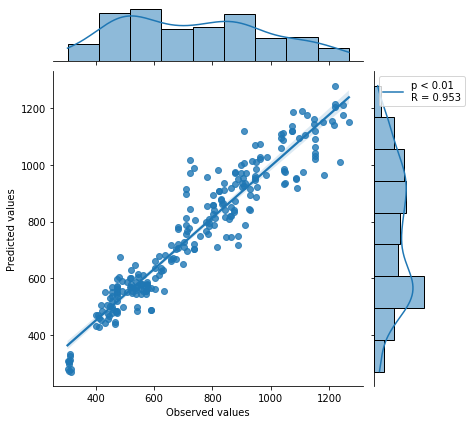

In [14]:
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df_300.columns[col1_obt], #Em x recebe os dados obtidos (rótulos)
    y=df_300.columns[col2_prev], #Em y recebe os valores previstos (imagens)
    kind='reg',
    data=df_300
)

if pear_pos_menor_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(round(pear_pos_menor_erro[1],3)) + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e r





# if print_fig == 1:
#     plt.savefig("results\\Corr_"+df.columns[campo_select]+""+str(exp)+""+df.columns[col1]+"-"+df.columns[col2]+".jpg", dpi=600)


In [15]:
# pear_pos_menor_erro

In [16]:
pear_pos_menor_erro[1]
if pear_pos_menor_erro[1] < 0.01:
  print('Sim, é inferior')
else:
  print('Não é inferior')

Sim, é inferior
